# Characters Classification with Neural Networks

In this notebook we are going to use the Neural Networks for image classification. We are going to use the same dataset of the lab on SVM: Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist) a dataset of traditional japanese handwritten kana.

The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

In [1]:
#load the required packages and check Scikit-learn version

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import pandas as pd

scikit-learn version:  0.23.2


In [2]:
# helper function to load KMNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

# TODO 
Set as seed for the random generator your Student ID (you can use your "numero di matricola"). Try to change the seed to see the impact of the randomization.

In [3]:
ID = 1234
np.random.seed(ID)

In [4]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
X, y = load_mnist("data")
print("Number of samples in the K-MNIST dataset:", X.shape[0])
# rescale the data
X = X / 255.0

Number of samples in the K-MNIST dataset: 60000


Now split into training and test. We start with a small training set of 600 samples to reduce computation time while 4000 samples will be used for testing. Make sure that each label is present at least 10 times in train and test set frequencies.

In [5]:
#random permute the data and split into training and test taking the first 600
#data samples as training and 4000 as test set
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

labelsT, freqsT = np.unique(y_test, return_counts=True)
print("Labels in test set: ", labels)
print("Frequencies in test set: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [61 63 77 52 68 55 48 53 62 61]
Labels in test set:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in test set:  [61 63 77 52 68 55 48 53 62 61]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


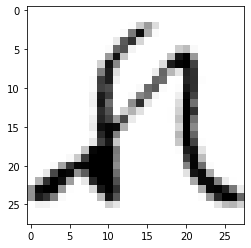

LABEL: 8
INPUT:


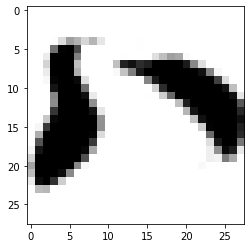

LABEL: 5
INPUT:


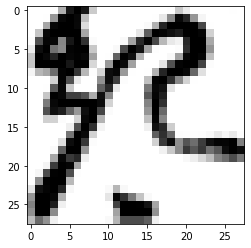

LABEL: 1


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,1000)

### TO DO 1

Now use a feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=100, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 50. Evaluate the architectures you chose using GridSearchCV with cv=5.

You can reduce the number of iterations if the running time is too long on your computer.


In [8]:
# these are sample values but feel free to change them as you like, try to experiment with different sizes!!
parameters = {'hidden_layer_sizes': [(10,), (20,), (40,), (20,20,), (40,20,10) ]}

mlp = MLPClassifier(max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

model = GridSearchCV(estimator = mlp,param_grid = parameters, scoring= 'accuracy', cv = 5, verbose = 1,
                        return_train_score=True) 
model.fit(X_train, y_train)
results = pd.DataFrame(model.cv_results_)
best_score = model.best_score_
best_params = model.best_params_

print ('RESULTS FOR NN\n')

print("Best parameters set found:",best_params)
#ADD YOUR CODE

print("Score with best parameters:",best_score)
#ADD YOUR CODE

print("\nAll scores on the grid:",results)
#ADD YOUR CODE

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    5.9s finished


RESULTS FOR NN

Best parameters set found: {'hidden_layer_sizes': (40,)}
Score with best parameters: 0.7183333333333334

All scores on the grid:    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.239985      0.016696         0.000598        0.000488   
1       0.239279      0.009248         0.000607        0.000496   
2       0.241291      0.008544         0.000397        0.000487   
3       0.188496      0.024290         0.000000        0.000000   
4       0.284538      0.099592         0.000798        0.000399   

  param_hidden_layer_sizes                                params  \
0                    (10,)         {'hidden_layer_sizes': (10,)}   
1                    (20,)         {'hidden_layer_sizes': (20,)}   
2                    (40,)         {'hidden_layer_sizes': (40,)}   
3                 (20, 20)      {'hidden_layer_sizes': (20, 20)}   
4             (40, 20, 10)  {'hidden_layer_sizes': (40, 20, 10)}   

   split0_test_score  split1_test_score  sp

### TO DO 2

Now try also different batch sizes, while keeping the best NN architecture you have found above. Remember that the batch size was previously set to the default value, i.e., min(200, n_samples). 
Recall that a batch size of 1 corresponds to baseline SGD, while using all the 480 training samples (there are 600 samples but in cross validation with 5 folders we use 1/5 of them for validation at each round) corresponds to standard GD and using a different mini-batch size lies in the middle between the two extreme cases.

In [30]:
# these are sample values corresponding to baseline SGD, a reasonable mini-batch size and standard GD
# again feel free to change them as you like, try to experiment with different batch sizes!!
parameters2 = {'hidden_layer_sizes':[(40,)],'batch_size': [1, 32, 480]}

# need to specify that you would like to use the standard k-fold split otherwise sklearn create splits of different sizes
kf = sklearn.model_selection.KFold(n_splits=5)

mlp2 = MLPClassifier(max_iter=250, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=0.1)
# recall to use cv=kf to use the k-fold subdivision seen in the lectures
model2 = GridSearchCV(estimator = mlp2,param_grid = parameters2, scoring= 'accuracy', cv = kf, verbose = 1,
                        return_train_score=True) 
model2.fit(X_train, y_train)
results2 = pd.DataFrame(model2.cv_results_)
best_score2 = model2.best_score_
best_params2 = model2.best_params_




print ('RESULTS FOR NN\n')

print("Best parameters set found:",best_params2)
#ADD YOUR CODE

print("Score with best parameters:",best_score2)
#ADD YOUR CODE

print("\nAll scores on the grid:",results2)
#ADD YOUR CODE

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  1.1min finished


RESULTS FOR NN

Best parameters set found: {'batch_size': 32, 'hidden_layer_sizes': (40,)}
Score with best parameters: 0.7466666666666667

All scores on the grid:    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      12.975767      3.292772         0.000598    4.885777e-04   
1       0.225668      0.010672         0.000997    1.907349e-07   
2       0.340489      0.027645         0.000997    2.861023e-07   

  param_batch_size param_hidden_layer_sizes  \
0                1                    (40,)   
1               32                    (40,)   
2              480                    (40,)   

                                             params  split0_test_score  \
0    {'batch_size': 1, 'hidden_layer_sizes': (40,)}           0.133333   
1   {'batch_size': 32, 'hidden_layer_sizes': (40,)}           0.733333   
2  {'batch_size': 480, 'hidden_layer_sizes': (40,)}           0.675000   

   split1_test_score  split2_test_score  ...  mean_test_score  std_test_score  \
0

### QUESTION 1

What do you observe for different architectures and batch sizes? How do the number of layers and their sizes affect the performances? What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?

## [ANSWER TO QUESTION 1]


With batch size 32 we can have better result and accuracy, and with bigger batch size, convergence gets difficult. Here 40 hidden layers gives the best result and we can not get good result with lots of hidden layers.

### TODO 3:

Plot the train and test accuracies as a function of the number of learnable parameters in your neural network. Print also the computation time for the various configurations you try (the code for getting the computation time is already provided). You can use 100 iterations (if you get a warning on convergence not reached it is not an issue for this lab)

Training MLP of size (10,) ...
Done, training time: 2.16 sec

Training MLP of size (20,) ...
Done, training time: 1.78 sec

Training MLP of size (40,) ...
Done, training time: 1.62 sec

Training MLP of size (20, 20) ...
Done, training time: 1.90 sec

Training MLP of size (40, 20, 10) ...
Done, training time: 2.89 sec



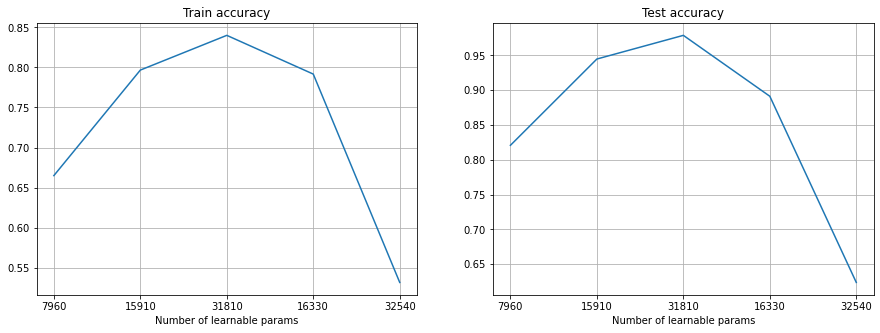

In [32]:
import time
from functools import reduce

# Function to compute the number of learnable parameters of a mlp given the size of its hidden layers
def param_count(hl_size):
    tot = 0
    input_size, output_size = X_train.shape[1], len(labels)
    tot += (input_size+1)*hl_size[0]
    for i in range(1,len(hl_size)):
        tot += (hl_size[i-1]+1)*hl_size[i]
    tot += (hl_size[-1]+1)*output_size
    return tot

hl_sizes = [(10,), (20,), (40,), (20,20,), (40,20,10)]
hl_labels = [param_count(t) for t in hl_sizes]

ti = time.time()
train_acc_list, test_acc_list = [], []
for hl_size in hl_sizes:
    print('Training MLP of size {} ...'.format(hl_size))
    mlp = MLPClassifier(hidden_layer_sizes=hl_size,max_iter=100, alpha=1e-4, solver='sgd',batch_size=32,
                    tol=1e-4, random_state=ID,
                    learning_rate_init=0.1)
    
    mlp.fit(X_train, y_train)
    mlp.fit(X_test,y_test)
    
    train_acc_list.append(mlp.score(X_train, y_train))
    test_acc_list.append(mlp.score(X_test, y_test))
    print('Done, training time: {:.2f} sec\n'.format(time.time()-ti))
    ti = time.time()

fig, ax = plt.subplots(1,2, figsize=(15,5))


ax[0].plot(train_acc_list)
ax[0].set_xlabel('Number of learnable params')
ax[0].set_title('Train accuracy')
ax[0].set_xticks(np.arange(0,len(hl_labels)))
ax[0].set_xticklabels(hl_labels)
ax[0].grid(True)

ax[1].plot(test_acc_list)
ax[1].set_xlabel('Number of learnable params')
ax[1].set_title('Test accuracy')
ax[1].set_xticks(np.arange(0,len(hl_labels)))
ax[1].set_xticklabels(hl_labels)
ax[1].grid(True)


## Question 2:

Comment about the training and test accuracies referring to the discussion on underfitting and overfitting we did in the course

## [ANSWER TO QUESTION 2]

With more hidden layers we will have overfitting and with less than 40 we have underfitting.

### TO DO 4

Now try also to use different learning rates, while keeping the best NN architecture and batch size you have found above. Plot the learning curves (i.e., the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate. Try to run each training for 100 iterations. 

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Minimum Loss for Learning Rate 0.0002 is: 1.0617323056139656


C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Minimum Loss for Learning Rate 0.002 is: 0.0700352029311102
Minimum Loss for Learning Rate 0.02 is: 0.0036003280927771955
Minimum Loss for Learning Rate 0.2 is: 0.09727500123163858
RESULTS FOR NN

Best parameters set found: <bound method BaseEstimator.get_params of MLPClassifier(batch_size=32, hidden_layer_sizes=40, learning_rate_init=0.02,
              max_iter=100, random_state=1234, solver='sgd')>
Minimum Loss with best parameters: 0.0036003280927771955
Score with best parameters: 0.9583333333333334


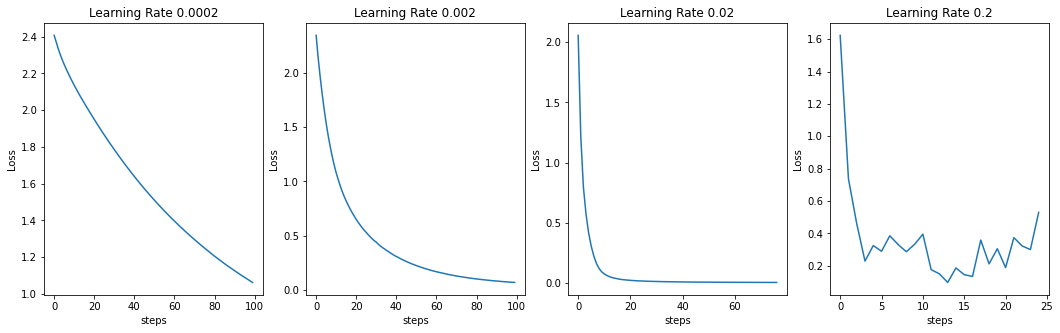

In [22]:
import matplotlib.pyplot as plt
import operator

lr_list = [0.0002, 0.002, 0.02, 0.2]
scores = {}
mlp4_1 = MLPClassifier(hidden_layer_sizes=40, solver='sgd',tol=1e-4,batch_size=32, learning_rate_init=lr_list[0],
                       max_iter=100, shuffle=True, random_state=ID)
mlp4_1.fit(X_train, y_train)
fig, ax = plt.subplots(1,4, figsize=(18,5))
ax[0].plot(mlp4_1.loss_curve_)
ax[0].set_title("Learning Rate 0.0002")
ax[0].set_xlabel('steps')
ax[0].set_ylabel('Loss')
best_loss4_1 = mlp4_1.best_loss_

print('Minimum Loss for Learning Rate 0.0002 is:',best_loss4_1)

mlp4_2 = MLPClassifier(hidden_layer_sizes=40, solver='sgd',tol=1e-4,batch_size=32, learning_rate_init=lr_list[1],
                       max_iter=100, shuffle=True, random_state=ID)
mlp4_2.fit(X_train, y_train)
ax[1].plot(mlp4_2.loss_curve_)
ax[1].set_title("Learning Rate 0.002")
ax[1].set_xlabel('steps')
ax[1].set_ylabel('Loss')
best_loss4_2 = mlp4_2.best_loss_

print('Minimum Loss for Learning Rate 0.002 is:',best_loss4_2)

mlp4_3 = MLPClassifier(hidden_layer_sizes=40, solver='sgd',tol=1e-4,batch_size=32, learning_rate_init=lr_list[2],
                       max_iter=100, shuffle=True, random_state=ID)
mlp4_3.fit(X_train, y_train)
ax[2].plot(mlp4_3.loss_curve_)
ax[2].set_title("Learning Rate 0.02")
ax[2].set_xlabel('steps')
ax[2].set_ylabel('Loss')
best_loss4_3 = mlp4_3.best_loss_
print('Minimum Loss for Learning Rate 0.02 is:',best_loss4_3)

mlp4_4 = MLPClassifier(hidden_layer_sizes=40, solver='sgd',tol=1e-4,batch_size=32, learning_rate_init=lr_list[3],
                       max_iter=100, shuffle=True, random_state=ID)
mlp4_4.fit(X_train, y_train)
ax[3].plot(mlp4_4.loss_curve_)
ax[3].set_title("Learning Rate 0.2")
ax[3].set_xlabel('steps')
ax[3].set_ylabel('Loss')
best_loss4_4 = mlp4_4.best_loss_
print('Minimum Loss for Learning Rate 0.2 is:',best_loss4_4)


best_score_all = min(best_loss4_1,best_loss4_2,best_loss4_3,best_loss4_4)
print ('RESULTS FOR NN\n')

print("Best parameters set found:",mlp4_3.get_params)
#ADD YOUR CODE

print("Minimum Loss with best parameters:",best_score_all)
best_accuracy = mlp4_4.score(X_train,y_train)
print("Score with best parameters:",best_accuracy)


### QUESTION 3

Comment about the learning curves (i.e. the variation of the loss over the steps). How does the curve changes for different learning rates in terms of stability and speed of convergence ?

## [ANSWER TO QUESTION 3]

With small learning rate we can not reach the best accuracy. Here the best learning rate is 0.02 and with a very small learning rate we can not find the minimum loss.

### TO DO 5

Now get training and test error for a NN with best parameters (architecture, batch size and learning rate) from above. Plot the learning curve also for this case (you can run the training for 500 iterations).


RESULTS FOR BEST NN

Best NN training error: 0.003600
Best NN test error: 0.002803


Text(0, 0.5, 'Loss')

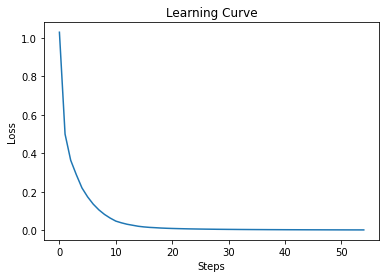

In [23]:
#get training and test error for the best NN model from CV

mlp5 = MLPClassifier(hidden_layer_sizes=40, solver='sgd',tol=1e-4,batch_size=32, learning_rate_init=0.02,
                       max_iter=500, shuffle=True, random_state=ID)
train = mlp5.fit(X_train, y_train)
training_error = train.best_loss_
test = mlp5.fit(X_test, y_test)
test_error = test.best_loss_
print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

#ADD YOUR CODE FOR PLOTTING
plt.plot(mlp5.loss_curve_)
plt.title("Learning Curve")
plt.xlabel("Steps")
plt.ylabel("Loss")

## More data 
Now let's do the same but using 4000 (or less if it takes too long on your machine) data points for training. Use the same NN architecture as before, but you can try more if you like and have a powerful computer!!

In [13]:
X = X[permutation]
y = y[permutation]

m_training = 4000

X_train6, X_test6 = X[:m_training], X[m_training:]
y_train6, y_test6 = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [61 63 77 52 68 55 48 53 62 61]


### TO DO 6

Now train the NNs with the added data points using the optimum parameters found above. Eventually, feel free to try different architectures if you like. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

In [14]:
# use best architecture and params from before

mlp6 = MLPClassifier(hidden_layer_sizes=40, solver='sgd',tol=1e-4,batch_size=480, 
                     learning_rate_init=0.01,max_iter=50, shuffle=True, random_state=ID,verbose=True)

#get training and test error for the NN
train6 = mlp6.fit(X_train6, y_train6)
training_error = train6.best_loss_
test6 = mlp6.fit(X_test6, y_test6)
test_error = test6.best_loss_
#ADD YOUR CODE
print ('\nRESULTS FOR NN\n')
print ("NN training error: %f" % training_error)
print ("NN test error: %f" % test_error)


Iteration 1, loss = 2.29143922
Iteration 2, loss = 2.03358356
Iteration 3, loss = 1.76474735
Iteration 4, loss = 1.48854562
Iteration 5, loss = 1.26723912
Iteration 6, loss = 1.11162904
Iteration 7, loss = 0.99978821
Iteration 8, loss = 0.91712836
Iteration 9, loss = 0.85010752
Iteration 10, loss = 0.79855534
Iteration 11, loss = 0.75551954
Iteration 12, loss = 0.72041087
Iteration 13, loss = 0.69048345
Iteration 14, loss = 0.66407401
Iteration 15, loss = 0.64030079
Iteration 16, loss = 0.61951008
Iteration 17, loss = 0.60039745
Iteration 18, loss = 0.58326152
Iteration 19, loss = 0.56774652
Iteration 20, loss = 0.55305924
Iteration 21, loss = 0.53999289
Iteration 22, loss = 0.52687945
Iteration 23, loss = 0.51537616
Iteration 24, loss = 0.50323576
Iteration 25, loss = 0.49269214
Iteration 26, loss = 0.48244458
Iteration 27, loss = 0.47227689
Iteration 28, loss = 0.46299704
Iteration 29, loss = 0.45356878
Iteration 30, loss = 0.44550390
Iteration 31, loss = 0.43718407
Iteration 32, los

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.25215543
Iteration 2, loss = 0.65332754
Iteration 3, loss = 0.54521371
Iteration 4, loss = 0.48660708
Iteration 5, loss = 0.44806444
Iteration 6, loss = 0.41879961
Iteration 7, loss = 0.39505005
Iteration 8, loss = 0.37583281
Iteration 9, loss = 0.35882248
Iteration 10, loss = 0.34447630
Iteration 11, loss = 0.33153725
Iteration 12, loss = 0.31987134
Iteration 13, loss = 0.30936712
Iteration 14, loss = 0.29988684
Iteration 15, loss = 0.29157636
Iteration 16, loss = 0.28344501
Iteration 17, loss = 0.27608879
Iteration 18, loss = 0.26939809
Iteration 19, loss = 0.26276811
Iteration 20, loss = 0.25703670
Iteration 21, loss = 0.25094166
Iteration 22, loss = 0.24587985
Iteration 23, loss = 0.24061527
Iteration 24, loss = 0.23583717
Iteration 25, loss = 0.23155696
Iteration 26, loss = 0.22711123
Iteration 27, loss = 0.22316724
Iteration 28, loss = 0.21920243
Iteration 29, loss = 0.21567849
Iteration 30, loss = 0.21228489
Iteration 31, loss = 0.20878566
Iteration 32, los

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


## QUESTION 4
Compare the train and test error you got with a large number of samples with the best one you obtained with only 600 data points. Comment about the results you obtained.

#### [ANSWER TO QUESTION 4]

It takes too much time to be converged with a large number of samples. But we can get better results if we have a good computer to run it.

### TO DO 7

Plot an example that was missclassified by NN with m=600 training data points and it is now instead correctly classified by NN with m=4000 training data points.

In [15]:
NN_prediction = mlp5.predict(X_test)
large_NN_prediction = mlp6.predict(X_test)

#ADD YOUR CODE
index = 0
misclassified_images = []
for label, predict_NN,predict_LNN in zip(y_test, NN_prediction,large_NN_prediction):
    if (label != predict_NN)and (label==predict_LNN): 
        misclassified_images.append(index)
    index +=1
print(misclassified_images)
plt.figure(figsize=(20,20))
plt.suptitle('Misclassifications by NN and correct classified by Large NN');

for plot_index, bad_index in enumerate(misclassified_images[0:10]):
    p = plt.subplot(4,5, plot_index+1) # 4x5 plot
    p.imshow(
        X_test[bad_index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    p.set_xticks(()); p.set_yticks(()) # remove ticks
    
    p.set_title(f'Pred_NN: {NN_prediction[bad_index]},pred_LNN:{large_NN_prediction[bad_index]} Actual: {y_test[bad_index]}')

[]


<Figure size 1440x1440 with 0 Axes>

### TO DO 8

Let's plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 600 data points and with 4000 data points. The code is already provided, just fix variable names (e.g., replace mlp , mlp_large with your estimators) in order to have it working with your implementation



Weights with 600 data points:


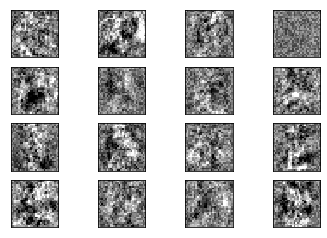

Weights with 4000 data points:


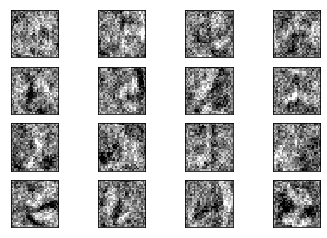

In [16]:
print("Weights with 600 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp5.coefs_[0].min(), mlp5.coefs_[0].max()
for coef, ax in zip(mlp5.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 4000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp6.coefs_[0].min(), mlp6.coefs_[0].max()
for coef, ax in zip(mlp6.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## QUESTION 5

Describe what do you observe by looking at the weights.

##### [ANSWER TO QUESTION 5]

With less data points we can see the weights better.

### TO DO 9

Take the best SVM model and its parameters, you found in the last notebook. Fit it on a few data points and compute its training and test scores. Then fit also a logistic regression model with C=1. 

In [17]:
m_training = 5000

X_train9, X_test9 = X[:m_training], X[m_training:2*m_training]
y_train9, y_test9 = y[:m_training], y[m_training:2*m_training]

# use best parameters found in the SVM notebook, create SVM and perform fitting
best_model = SVC(C=10, gamma = 1e-02, kernel='rbf')
best_model.fit(X_train9,y_train9)
#ADD YOUR CODE

print ('RESULTS FOR SVM')

SVM_training_error =  1- best_model.score(X_train9,y_train9)

print("Training score SVM:")
print(SVM_training_error)

SVM_test_error = 1- best_model.score(X_test9,y_test9)
print("Test score SVM:")
print(SVM_test_error)

RESULTS FOR SVM
Training score SVM:
0.0
Test score SVM:
0.08140000000000003


In [18]:
from sklearn import linear_model

regL2 = linear_model.LogisticRegression(C=1)
regL2.fit(X_train9, y_train9)

# you can re-use your code from Lab 2

#ADD YOUR CODE

print ('\nRESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION')

training_error =  1- regL2.score(X_train9,y_train9)
test_error =  1- regL2.score(X_test9,y_test9)

print ("Training error (reg): %f" % training_error)
print ("Test error (reg): %f" % test_error)


RESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION
Training error (reg): 0.029800
Test error (reg): 0.232000


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## QUESTION 6
Compare the results of Logistic Regression, SVM and NN. Which one achieve the best results? 

###### [ANSWER TO QUESTION 6]

Result for  Logistic Regression with regulization:

Training error (reg): 0.029800

Test error (reg): 0.232000

RESULTS FOR SVM:

Training score SVM:0.0

Test score SVM:0.08140000000000003

RESULTS FOR NN:

NN training error: 0.322938

NN test error: 0.163426

It can be seen that the SVM has the best result.